In [2]:
#using Pkg
#Pkg.activate("D:\\Science\\Code\\Julia\\envr")

In [1]:
using StaticArrays, DifferentialEquations, DynamicalSystems, BenchmarkTools, CairoMakie

In [122]:
function TM_with_vector(u, p, t)
    
    U(y) = U0 + ΔU0 / ( 1 + exp( -50*(y-ythr) ) )
    σ(x) = 1 / ( 1 + exp( -20*(x-xthr) ) )

    # u[1] - E; u[2] - x; u[3] - y
    # α - 1, τ - 2, τD - 3, τy - 4, J - 5, xthr - 6, ythr - 7, U0 - 8, ΔU0 - 9, β - 10, I0 -11
    
    du1 = (-u[1] + p[1] * log( 1 + exp( (p[5] * U(u[3]) * u[2] * u[1] + p[11]  ) / (p[1]) ) ) ) / p[2]
    du2 = (1-u[2])/p[3] - U(u[3])*u[2]*u[1]
    du3 = (-u[3])/p[4] + p[10]*σ(u[2])
    return SA[du1, du2, du3]
end;

In [123]:
t = 2000.0; tt = 250.0; tstep = 0.001
trange = range(0.0, t, step = tstep)
integ_set = (alg = RK4(), adaptive = false, dt = tstep, save_everystep = false);

In [124]:
const τ = 0.013;  const τD = 0.080;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58;  const U0 = 0.3;  const ΔU0 = 0.305;

In [125]:
I0 = -1.56203902;

In [126]:
p = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0 = SA[6.530858570620066, 0.703597679411986, 0.41933517415636135]

3-element SVector{3, Float64} with indices SOneTo(3):
 6.530858570620066
 0.703597679411986
 0.41933517415636135

In [127]:
ds = ContinuousDynamicalSystem(TM_with_vector, u0, p);

In [128]:
@btime tr = trajectory(ds, t, Δt = tstep; Ttr = tt, diffeq = integ_set);

  810.931 ms (82 allocations: 45.78 MiB)


In [94]:
lb_size = 35; tck_size = 30;
ts, tf = 1, 15000

(1, 15000)

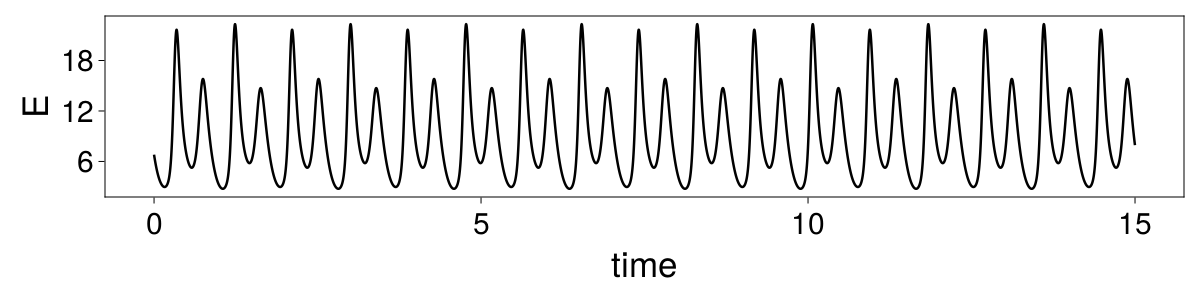

In [95]:
f = Figure(resolution = (1200, 300))
axis = Axis(f[1, 1], xlabel = "time", ylabel = "E",
            xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, yticks = [6, 12, 18])
lines!(axis, trange[ts:tf], tr[ts:tf, 1], linewidth = 2.5, color = :black)
f

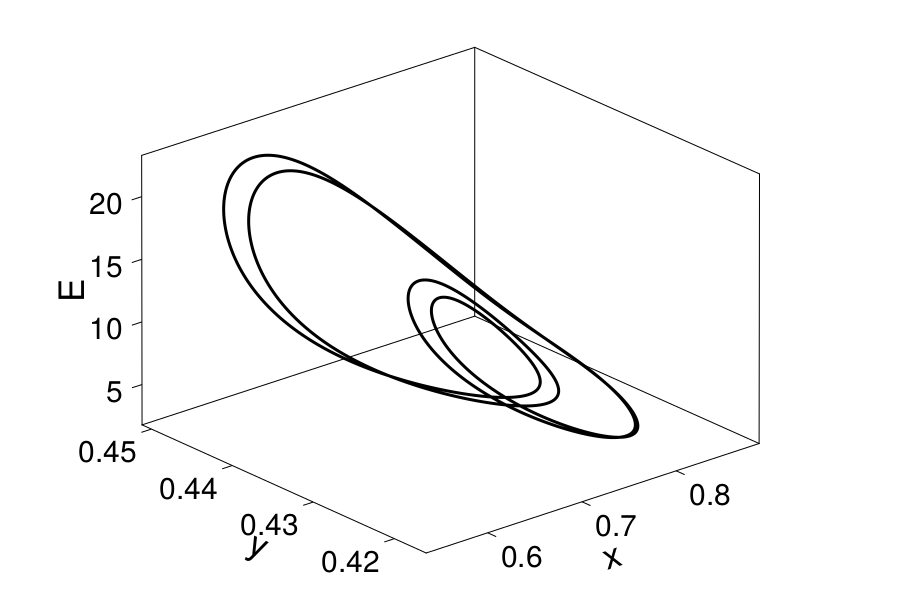

In [109]:
f = Figure(resolution = (900, 600))
axis3 = Axis3(f[1, 1], xlabel = "x", ylabel = "y", zlabel = "E",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
                xgridvisible = false, ygridvisible = false, zgridvisible = false)
lines!(axis3, tr[ts:tf, 2], tr[ts:tf, 3], tr[ts:tf, 1], linewidth = 3.0, color = :black)
f